<h1 align="center"> Crabi Test</h1>

<p align="center">
  <img src="/Users/geyne/Desktop/CrabiTest/Images/unnamed.png" alt="Crabi Logo" width="120">
</p>

# Diccionario
1. Reservas: Fondos para cubrir los siniestros 
2. Siniestralidad : Mide que tanto se esta pagando en siniestros en relacion a lo que se cobra en primas, a mayor siniestralidad menor profit 
3. Servicios: Son las asistencias proporcionadas a los asegurados
4. Severidad: Lo que tiene que pagar la aseguradora por un siniestro
5. Deducible: es un porcentaje del valor comercial del auto, Aplica solo a: **Danos Materiales y robo total**

# Data MarkDowns
A nivel de datos Crabi utiliza la tabla **CLAIM** para llevar el historico de cada siniestro, y **Service** las acciones de cada siniestro

- `claim.xlsx` – Historico de siniestros
- `service.xlsx` – Servicios aplicados a los siniestros de la tabla service 
- `people.xlsx` – informacion del asegurado
- `status.xlsx` - Contexto
- `status_type.xlsx`- Cotexto
- `status_cause.xlsx` - Contexto
- `Diccionario de Datos.xlsx` – Diccionario
## ERD Sinister Module
<p align="center">
  <img src="/Users/geyne/Desktop/CrabiTest/DataBase/claims_er.png" alt="Crabi Logo" width="800">
</p>

# 1. Cual es la Siniestralidad Mensual de la compania?

In [97]:
#Importing Dependencies 
!pip install squarify

import squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [98]:
#Instaurando tablas
claimTable = pd.read_excel("/Users/geyne/Desktop/CrabiTest/DataBase/claim.xlsx").convert_dtypes()
peopleTable = pd.read_excel("/Users/geyne/Desktop/CrabiTest/DataBase/people.xlsx").convert_dtypes()
ServiceTable = pd.read_excel("/Users/geyne/Desktop/CrabiTest/DataBase/service.xlsx").convert_dtypes()
StatusTypeTable = pd.read_excel("/Users/geyne/Desktop/CrabiTest/DataBase/status_type.xlsx").convert_dtypes()
StatusTable = pd.read_excel("/Users/geyne/Desktop/CrabiTest/DataBase/status.xlsx").convert_dtypes()
#Def constants
PrimasDevengadas = 200000
Deducible = 100000 * 0.05


# Data Cleaning 

In [99]:
#Defininng Data Frames
df_Service = ServiceTable
df_people = peopleTable
df_Claim = claimTable
df_StatusType = StatusTypeTable
df_Status = StatusTable
#Cleaning Status 
df_Status = df_Status[["id","status_type_id","name"]]
#Cleaning Status Type
df_StatusType =df_StatusType[["id","name"]]
#merging table Status with status_Type
df_Status = df_Status.merge(df_StatusType,left_on="status_type_id",right_on="id",how="left")
df_Status = df_Status.rename(columns={'id_x':'type_status_id','name_x':'Status Name','name_y':'Status Type'})
df_Status = df_Status.drop(columns=['status_type_id','id_y'])
#cleaning Service and merging with Status
df_Service.fillna({"amount":0}, inplace=True)
df_Service = df_Service.merge(df_Status,on='type_status_id',how='left')
df_Service = df_Service.drop(columns=['type_status_id','provider_id','subprovider_id','description','created_by','seq','created_at','updated_at'])
#Cleaning People 
df_people = df_people.drop(columns=['type_status_id','license_id','vehicle_id','address_id','cancelled_at','created_by','created_at','updated_at','phone'])
df_people['Nombre'] = df_people['first_name'].fillna(" ").astype("string") + ' ' + df_people['first_last_name'].fillna(" ").astype("string")  + ' ' + df_people['second_last_name'].fillna(" ").astype("string") 
df_people = df_people.drop(columns=['first_name','first_last_name','second_last_name'])
df_people['gender'] = df_people['gender'].fillna('Not Defined')
df_people['birthdate'] = df_people['birthdate'].fillna('Not Defined')
df_people['email'] = df_people['email'].fillna('Not Defined')
#Merging Service with people
df_Service  = df_Service.merge(df_people, left_on='people_id',right_on='id',how="left")
df_Service = df_Service.drop(columns=['id_x','number','id_y','Status Type','policy_id','people_id','gender','Nombre','email','birthdate'])

#En caso de que no exista amount en el servicio, ignorar el servicio para el cálculo de la siniestralidad.
df_Service = df_Service[df_Service['amount']!=0]
df_Service



,coverage_id,amount,deductible,Status Name,claim_id
1,d348e5c4-1e27-45ca-b261-4e72c116c957,-150000,False,Ajuste,018aaf3e-412a-7c40-87fa-10d11e42d1e1
2,c2b3cdd7-2c89-4d92-aa04-6b343ad91425,-500000,True,Reparación,018b2a95-3bfb-7f17-8332-42764e6fd227
3,c2b3cdd7-2c89-4d92-aa04-6b343ad91425,-1000000,False,Reparación,018b48ed-55d4-785e-b727-01997565f179
6,c2b3cdd7-2c89-4d92-aa04-6b343ad91425,-500000,True,Reparación,018b5f6f-c99a-7470-a813-941d18cd5efe
7,c2b3cdd7-2c89-4d92-aa04-6b343ad91425,-500000,False,Reparación,01890c39-b760-7621-885d-4cb8558fb67f
...,...,...,...,...,...
829,d348e5c4-1e27-45ca-b261-4e72c116c957,-50000,False,Ajuste,018a724f-c479-7723-b8ca-f82dcc9114a3
832,<NA>,-5000,True,Reparación,0189a9a2-8e91-7efd-a6e7-a915af4f2b2e
833,c2b3cdd7-2c89-4d92-aa04-6b343ad91425,-10000,True,Reparación,018a0513-6979-7f43-a9fb-2c00bc2a8ca7
834,c2b3cdd7-2c89-4d92-aa04-6b343ad91425,-222500,True,Reparación,0188b6c3-f289-7dd6-80a1-89eaedc1df16


In [100]:
#Service apply coverage?
df_Service["Cobertura"] = np.where(
    df_Service["coverage_id"].notna(),
    True,
    False)
df_Service = df_Service.drop(columns=['coverage_id'])
orden = [ 'claim_id','Status Name','amount','deductible','Cobertura']
df_Service = df_Service[orden]

# Factores a consideracion
1. Al servicio aplica el deducible?
2. El servicio tiene cobertura

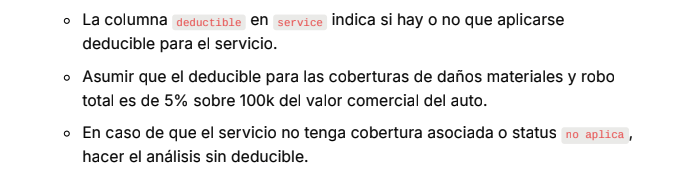

In [101]:
#Amount after deductible and Coverage
df_Service['Amount After conditions'] = np.where(
    (df_Service['deductible'] == True) & (df_Service['Cobertura'] == True),
    #deducible is Positive here because this is an income for Crabi
    df_Service['amount']+ Deducible,
    df_Service['amount']
)
df_Service = df_Service.sort_values(by=['claim_id'],ascending=True)
df_Service

,claim_id,Status Name,amount,deductible,Cobertura,Amount After conditions
834,0188b6c3-f289-7dd6-80a1-89eaedc1df16,Reparación,-222500,True,True,-217500.0
814,0188d409-b457-712e-aee4-fb37f8cfba6d,Ajuste,222300,False,True,222300
179,0188d449-ef63-7c97-b7c3-96e863f0c579,Indemnización,200000,False,True,200000
310,0188d449-ef63-7c97-b7c3-96e863f0c579,Orden Tradicional,5000,False,True,5000
185,0188d449-ef63-7c97-b7c3-96e863f0c579,Investigación,2000,False,False,2000
...,...,...,...,...,...,...
135,018b89e8-de44-7eab-88b6-83f961605957,Reparación,-9898900,False,True,-9898900
126,018b89e8-de44-7eab-88b6-83f961605957,Reparación,-7868700,False,True,-7868700
60,018b89e8-de44-7eab-88b6-83f961605957,Reparación,-555500,False,True,-555500
243,018b9116-aebe-771c-9bc4-1128d50c5fff,Reparación,-500000,True,True,-495000.0


# Calculando la serveridad 
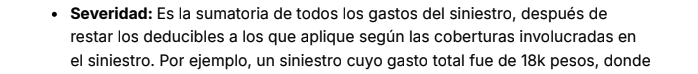

In [102]:
#Calculating Severity by Grouping Claim ID
df_severity = (
    df_Service
        .groupby("claim_id", as_index=False)["Amount After conditions"]
        .sum()
        .rename(columns={"Amount After conditions": "Severidad"})
)

df_severity

,claim_id,Severidad
0,0188b6c3-f289-7dd6-80a1-89eaedc1df16,-217500.0
1,0188d409-b457-712e-aee4-fb37f8cfba6d,222300
2,0188d449-ef63-7c97-b7c3-96e863f0c579,3027255
3,0188da6f-35ff-7a59-bbcd-76c51e540fd5,1212
4,0188dd0d-2a8c-71d8-b9a5-00a4bcc19b01,1003
...,...,...
188,018b8321-75d5-7ac3-8e0c-fa87906edc5b,-1000000
189,018b8869-1912-749d-b48f-86b2c6d951b1,-595000.0
190,018b89e8-de44-7eab-88b6-83f961605957,-685289600
191,018b9116-aebe-771c-9bc4-1128d50c5fff,-495000.0


In [103]:
df_severity["Severidad"] = pd.to_numeric(
    df_severity["Severidad"],
    errors="coerce"
)
df_severity['Severidad'].describe()

count    1.930000e+02
mean    -2.395552e+07
std      1.378168e+08
min     -1.324775e+09
25%     -1.050500e+06
50%     -2.131230e+05
75%     -1.450600e+04
max      8.989898e+06
Name: Severidad, dtype: float64

# Cleaning Claim Table

In [104]:
#Eliminando columnas
df_Claim = df_Claim.drop(columns=
                         ['address_id',
                          'original_claim_id',
                          'liability_status_id',
                          'cancelled_reason_status_id',
                          'seq',
                          'policy_id',
                          'created_by',
                          'declaration_cabin',
                          'reporting_name',
                          'third_car_description',
                          'conclusion',
                          'reporting_phone',
                          'scheduled_at',
                          'updated_at',
                          'amis_reported_at',
                          'declaration',
                          ])
df_Claim

,id,type_status_id,status_cause_type_id,number,policy_number,occurred_at,created_at,policy_person_id
0,018a111c-7788-76de-af1a-555ac43faa81,<NA>,<NA>,CRA-2023000486,AE-1002372,<NA>,2023-08-20 04:03:12+00,088fbd48-cc1c-474a-b023-a352edea3f20
1,0189b6ae-3c37-73ff-bd62-b6d45b886fee,a31a3903-7819-4d33-8a40-ad06df4e5d4b,5eec97a7-a9bb-45c8-942c-1d35454b4219,CRA-2023000382,AE-1002335,2023-08-02 04:00:00+00,2023-08-02 14:36:59+00,69beb367-a254-4756-864d-ff137c754fa8
2,0189c2d1-2a49-73db-a3c4-2399832a2942,<NA>,<NA>,CRA-2023000400,KV-1002359,<NA>,2023-08-04 23:10:35+00,0f532d2f-b838-44ad-ae0a-2563ba844db2
3,0189dc1c-1c9e-755e-8674-7d30a16b8423,a31a3903-7819-4d33-8a40-ad06df4e5d4b,<NA>,CRA-2023000433,AE-1002236,2023-08-08 03:00:00+00,2023-08-09 21:02:57+00,19661dc2-570e-4ddd-89ac-8e08243b0d74
4,0188e82c-9b05-7065-abd8-581151eb36ff,a31a3903-7819-4d33-8a40-ad06df4e5d4b,2755aed2-f65e-4f25-9de5-26b777b0b8df,CRA-2023000104,AE-1002224,2023-06-23 03:14:00+00,2023-06-23 12:13:37+00,74eed741-06ea-40c2-a153-f763aded6e9e
...,...,...,...,...,...,...,...,...
564,018a76c9-f3f8-7c15-8237-90451fcd1ceb,<NA>,<NA>,CRA-2023000527,IT-1002412,<NA>,2023-09-08 21:54:21+00,3300b4a6-8247-4470-872f-4505b7cf9be2
565,0189b747-a4a6-71e2-b816-a100688d863b,<NA>,<NA>,CRA-2023000385,KV-1002354,<NA>,2023-08-02 17:24:33+00,0f532d2f-b838-44ad-ae0a-2563ba844db2
566,018b68cc-94e8-72d4-938d-ef36410855cb,5483b077-eed8-4cbf-8b34-8a32a39490d8,<NA>,CRA-2023001082,AE-1002498,2023-10-25 05:00:00+00,2023-10-25 21:45:19+00,a74334ef-643f-419b-9667-9582ffb6a01e
567,018a9a1e-0057-7d77-a2b1-36bbeedeb1b3,a31a3903-7819-4d33-8a40-ad06df4e5d4b,<NA>,CRA-2023000536,KV-1002432,2023-09-15 06:00:00+00,2023-09-15 18:32:52+00,23e1bdd0-1901-43f2-a0c4-6f3373831bbb


In [105]:
#Merge Claim to severity table
df_Claim = df_Claim.merge(df_severity,left_on='id',right_on='claim_id',how='left')
df_Claim = df_Claim.drop(columns=['id','claim_id'])
df_Claim = df_Claim.merge(df_Status,left_on='type_status_id',right_on='type_status_id',how='left')
df_Claim = df_Claim.drop(columns = ['type_status_id','status_cause_type_id','policy_person_id','occurred_at'])
df_Claim['Severidad'] = df_Claim['Severidad'].fillna(0)

In [106]:
df_Claim

,number,policy_number,created_at,Severidad,Status Name,Status Type
0,CRA-2023000486,AE-1002372,2023-08-20 04:03:12+00,0.0,<NA>,<NA>
1,CRA-2023000382,AE-1002335,2023-08-02 14:36:59+00,-210000.0,Colisión,ClaimType
2,CRA-2023000400,KV-1002359,2023-08-04 23:10:35+00,0.0,<NA>,<NA>
3,CRA-2023000433,AE-1002236,2023-08-09 21:02:57+00,-91986.0,Colisión,ClaimType
4,CRA-2023000104,AE-1002224,2023-06-23 12:13:37+00,80500.0,Colisión,ClaimType
...,...,...,...,...,...,...
564,CRA-2023000527,IT-1002412,2023-09-08 21:54:21+00,0.0,<NA>,<NA>
565,CRA-2023000385,KV-1002354,2023-08-02 17:24:33+00,0.0,<NA>,<NA>
566,CRA-2023001082,AE-1002498,2023-10-25 21:45:19+00,0.0,Asistencia,ClaimType
567,CRA-2023000536,KV-1002432,2023-09-15 18:32:52+00,0.0,Colisión,ClaimType


# Findings 

* Existen 568 Casos Abiertos 

In [107]:
df_Claim['number'].nunique

<bound method IndexOpsMixin.nunique of 0      CRA-2023000486
1      CRA-2023000382
2      CRA-2023000400
3      CRA-2023000433
4      CRA-2023000104
            ...      
564    CRA-2023000527
565    CRA-2023000385
566    CRA-2023001082
567    CRA-2023000536
568    CRA-2023000374
Name: number, Length: 569, dtype: string>

* De los 568 Casos Solo 191 Casos involucraron algun tipo de servicio
### Solo 33% de los Claims involucraron Servicios


In [108]:
df_Claim[df_Claim['Severidad'] !=0].shape[0]

191

* El Gasto Mayor pagado por crabi fue: -1'324,774,600 $
* El Ingreso Mayor recibido fue: 8,989,898.0 $
* El valor Medio de Severidad: -8,125,509.17 $

In [109]:
col = df_Claim["Severidad"]

maximo  = col.max()
minimo  = col.min()
media   = col.mean()
mediana = col.median()

maximo, minimo, media, mediana

(8989898.0, -1324774600.0, -8125509.170474517, 0.0)

# Identificacion de Outliers

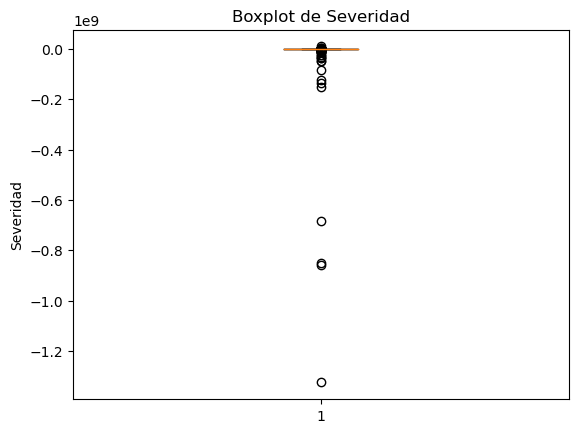

In [110]:
plt.boxplot(df_Claim["Severidad"].dropna())
plt.title("Boxplot de Severidad")
plt.ylabel("Severidad")
plt.show()

*Calculando Percentiles

In [111]:
Q1 = df_Claim["Severidad"].quantile(0.25)
Q3 = df_Claim["Severidad"].quantile(0.75)
IQR = Q3 - Q1

Q1, Q3, IQR

(-16000.0, 0.0, 16000.0)

* Definiendo Limite mayor y limite superior

In [112]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-40000.0, 24000.0)

* Calculo de Outliers

In [113]:
outliers = df_Claim[
    (df_Claim["Severidad"] < lower_bound) |
    (df_Claim["Severidad"] > upper_bound)
]

outliers

,number,policy_number,created_at,Severidad,Status Name,Status Type
1,CRA-2023000382,AE-1002335,2023-08-02 14:36:59+00,-210000.0,Colisión,ClaimType
3,CRA-2023000433,AE-1002236,2023-08-09 21:02:57+00,-91986.0,Colisión,ClaimType
4,CRA-2023000104,AE-1002224,2023-06-23 12:13:37+00,80500.0,Colisión,ClaimType
9,CRA-2023000453,AE-1001765,2023-08-11 23:21:42+00,-1850169.0,Colisión,ClaimType
12,CRA-2023000497,AE-1002372,2023-08-24 16:50:14+00,-1595098.0,Colisión,ClaimType
...,...,...,...,...,...,...
557,CRA-2023000496,IT-1002366,2023-08-24 15:50:09+00,-825500.0,Colisión,ClaimType
559,CRA-2023000420,AE-1002335,2023-08-08 17:22:38+00,-8012200.0,Colisión,ClaimType
561,CRA-2023000483,WO-1002365,2023-08-18 16:06:43+00,-1200080.0,Colisión,ClaimType
563,CRA-2023000516,AE-1002398,2023-08-30 17:25:50+00,-200000.0,Colisión,ClaimType


In [114]:
df_sin_outliers = df_Claim[
    (df_Claim["Severidad"] >= lower_bound) &
    (df_Claim["Severidad"] <= upper_bound)
]
df_sin_outliers

,number,policy_number,created_at,Severidad,Status Name,Status Type
0,CRA-2023000486,AE-1002372,2023-08-20 04:03:12+00,0.0,<NA>,<NA>
2,CRA-2023000400,KV-1002359,2023-08-04 23:10:35+00,0.0,<NA>,<NA>
5,CRA-2023000410,AE-1002334,2023-08-05 04:48:26+00,0.0,Colisión,ClaimType
6,CRA-2023000421,AE-1002335,2023-08-08 17:45:07+00,0.0,Asistencia,ClaimType
7,CRA-2023000562,KV-1002040,2023-09-25 23:50:39+00,0.0,<NA>,<NA>
...,...,...,...,...,...,...
562,CRA-2023000430,CH-1002349,2023-08-09 12:28:55+00,-4738.0,Colisión,ClaimType
564,CRA-2023000527,IT-1002412,2023-09-08 21:54:21+00,0.0,<NA>,<NA>
565,CRA-2023000385,KV-1002354,2023-08-02 17:24:33+00,0.0,<NA>,<NA>
566,CRA-2023001082,AE-1002498,2023-10-25 21:45:19+00,0.0,Asistencia,ClaimType


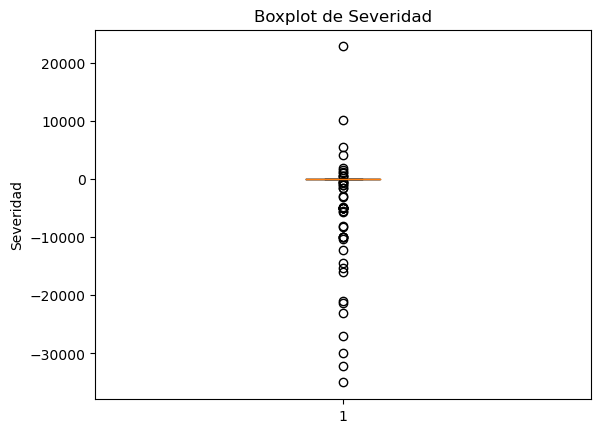

In [115]:
plt.boxplot(df_sin_outliers["Severidad"].dropna())
plt.title("Boxplot de Severidad")
plt.ylabel("Severidad")
plt.show()

In [116]:
df_sin_outliers.describe()

,Severidad
count,428.000000
mean,-778.056075
std,4201.033112
min,-35000.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,22832.000000


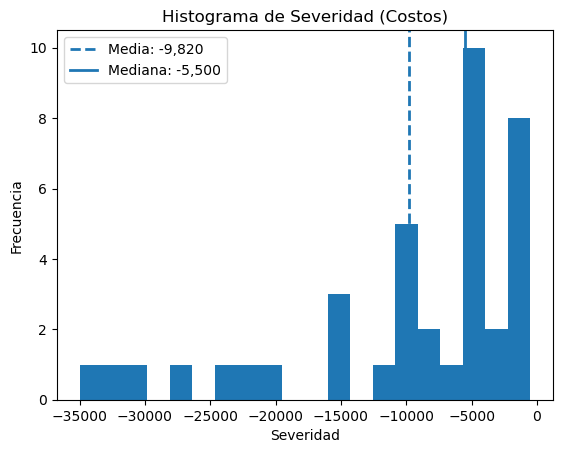

In [117]:
data = df_sin_outliers.loc[df_sin_outliers["Severidad"] < 0, "Severidad"]

mean = data.mean()
median = data.median()

plt.hist(data, bins=20)

plt.axvline(mean, linestyle="--", linewidth=2, label=f"Media: {mean:,.0f}")
plt.axvline(median, linestyle="-", linewidth=2, label=f"Mediana: {median:,.0f}")

plt.title("Histograma de Severidad (Costos)")
plt.xlabel("Severidad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# Calculando la siniestralidad Mensual

In [118]:
#Data frame claim, grouped by Ticket Created At
df_Claim["created_at"] = pd.to_datetime(df_Claim["created_at"])
df_Claim["month"] = df_Claim["created_at"].dt.to_period("M")
severidad_mensual = (
    df_Claim
        .groupby("month", as_index=False)["Severidad"]
        .sum()
)
severidad_mensual["prima_mensual"] = PrimasDevengadas
severidad_mensual["siniestralidad"] = (
    (severidad_mensual["Severidad"].abs()/100)
    / severidad_mensual["prima_mensual"]
)
severidad_mensual["siniestralidad %"] = (
    severidad_mensual["siniestralidad"] * 100
)
severidad_mensual

/var/folders/fk/cvrcy451067_965x_wm3fkwc0000gn/T/ipykernel_81674/309618888.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_Claim["month"] = df_Claim["created_at"].dt.to_period("M")


,month,Severidad,prima_mensual,siniestralidad,siniestralidad %
0,2023-06,-3.429902e+06,200000,0.171495,17.149510
1,2023-07,-1.017002e+08,200000,5.085012,508.501245
2,2023-08,-2.505731e+08,200000,12.528654,1252.865410
3,2023-09,-2.754885e+08,200000,13.774424,1377.442425
4,2023-10,-3.304612e+09,200000,165.230610,16523.061000
5,2023-11,-6.876108e+08,200000,34.380540,3438.054000


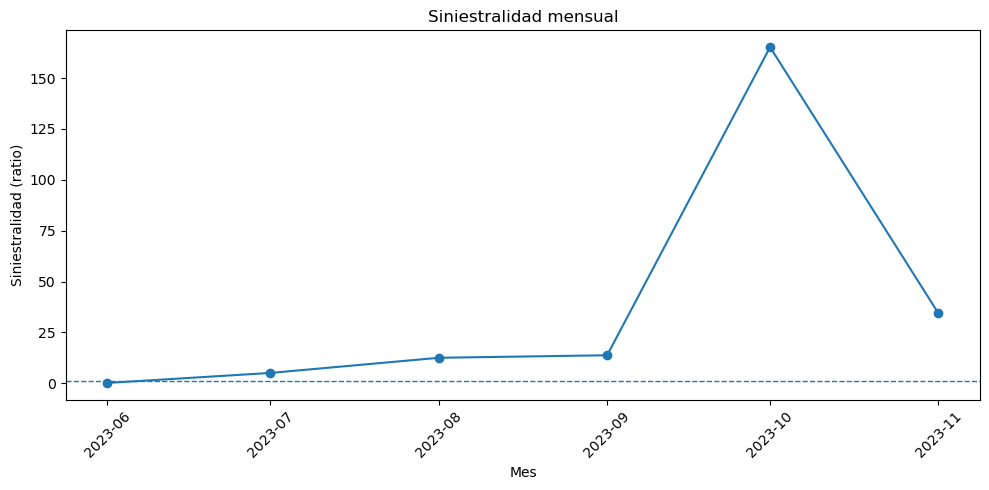

In [119]:

plot_df = severidad_mensual.copy()
plot_df["month"] = plot_df["month"].astype(str)             
plot_df["month"] = pd.to_datetime(plot_df["month"])          
plot_df = plot_df.sort_values("month")

plt.figure(figsize=(10, 5))
plt.plot(plot_df["month"], plot_df["siniestralidad"], marker="o")


plt.axhline(1, linestyle="--", linewidth=1)

plt.title("Siniestralidad mensual")
plt.xlabel("Mes")
plt.ylabel("Siniestralidad (ratio)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ¿Cuál es la cobertura con mayor y menor cantidad de siniestros?

In [120]:
# Definiendo Nuevos Data Frames 
df_Service_claim = ServiceTable
#Merging Service table with Status
df_Service_claim = df_Service_claim.merge(df_Status,left_on='coverage_id',right_on='type_status_id',how='left')
#Merging new Service with People
df_Service_claim = df_Service_claim.merge(df_people,left_on='people_id',right_on='id',how='left')

In [121]:
#Cleaning Columns 
cols = ['claim_id','Status Type','Status Name']
df_Service_claim= df_Service_claim[cols]
#Creating new Data frame for Clame table called: claim coverage 
df_Claim_coverage = claimTable
#Merging new table with Claim 
df_Claim_coverage = df_Claim_coverage.merge(df_Service_claim,left_on='id',right_on='claim_id',how='left')
cols = ['number','policy_number','Status Type','Status Name']
df_Claim_coverage = df_Claim_coverage[cols]
df_Claim_coverage.convert_dtypes()
df_Claim_coverage

,number,policy_number,Status Type,Status Name
0,CRA-2023000486,AE-1002372,<NA>,<NA>
1,CRA-2023000382,AE-1002335,<NA>,<NA>
2,CRA-2023000382,AE-1002335,CoverageType,DM
3,CRA-2023000382,AE-1002335,CoverageType,DM
4,CRA-2023000382,AE-1002335,<NA>,<NA>
...,...,...,...,...
1062,CRA-2023001082,AE-1002498,<NA>,<NA>
1063,CRA-2023000536,KV-1002432,CoverageType,No Aplica
1064,CRA-2023000374,CH-1002349,CoverageType,GM
1065,CRA-2023000374,CH-1002349,CoverageType,DM


In [122]:
#Filtrando by CoverageType
df_Claim_coverage = df_Claim_coverage[df_Claim_coverage['Status Type'] == 'CoverageType']
df_Claim_coverage

,number,policy_number,Status Type,Status Name
2,CRA-2023000382,AE-1002335,CoverageType,DM
3,CRA-2023000382,AE-1002335,CoverageType,DM
7,CRA-2023000382,AE-1002335,CoverageType,RCB
10,CRA-2023000104,AE-1002224,CoverageType,GM
12,CRA-2023000104,AE-1002224,CoverageType,RCB
...,...,...,...,...
1054,CRA-2023000430,CH-1002349,CoverageType,RCP
1057,CRA-2023000430,CH-1002349,CoverageType,DM
1063,CRA-2023000536,KV-1002432,CoverageType,No Aplica
1064,CRA-2023000374,CH-1002349,CoverageType,GM


In [123]:
#Grouping by Status Name 
coverage_counts = (
    df_Claim_coverage
        .groupby('Status Name')
        .size()
        .reset_index(name='num_claims')
        .sort_values('num_claims', ascending=False)
)

coverage_counts

,Status Name,num_claims
2,DM,220
4,No Aplica,73
3,GM,49
5,RCB,40
0,AL,20
1,AV,19
6,RCP,18
7,RT,8


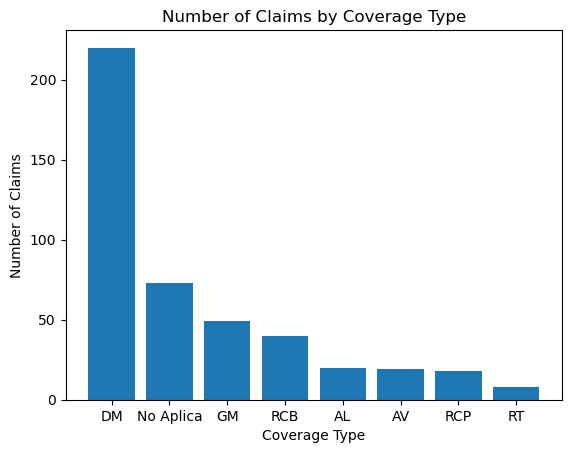

In [124]:
#Plotting  Number of claims
plt.figure()
plt.bar(
    coverage_counts['Status Name'],
    coverage_counts['num_claims']
)
plt.xlabel('Coverage Type')
plt.ylabel('Number of Claims')
plt.title('Number of Claims by Coverage Type')
plt.show()

* La cobertura con mas incidencias es Danos Materiales con 220 incidencias 
* La cobertura con menos incidencias es Robo Total con 8 claims

# ¿Cuál es el partner con mayor y menor siniestralidad? ¿cuál es su severidad promedio?

In [125]:
#Separating Policy_number into Partner
df_Claim['partner'] = df_Claim['policy_number'].str.split('-').str[0]
df_Claim = df_Claim[df_Claim['Severidad'] != 0 ]
cols =['partner','Severidad']
df_Claim = df_Claim[cols]
df_Claim

,partner,Severidad
1,AE,-210000.0
3,AE,-91986.0
4,AE,80500.0
9,AE,-1850169.0
12,AE,-1595098.0
...,...,...
559,AE,-8012200.0
561,WO,-1200080.0
562,CH,-4738.0
563,AE,-200000.0


In [126]:
#Grouping into Partners
Partner_counts = (
    df_Claim
        .groupby('partner')['Severidad']
        .sum()
        .reset_index(name='Severity')
        .sort_values('Severity', ascending=True)
)

Partner_counts

,partner,Severity
0,AE,-2.547945e+09
3,IT,-1.868810e+09
4,KV,-1.174661e+08
5,SE,-4.058175e+07
1,CH,-2.718060e+07
2,DA,-2.023207e+07
6,WO,-1.200080e+06


In [127]:
#Average
Partner_Average = (
    df_Claim
        .groupby('partner')['Severidad']
        .mean()
        .reset_index(name='Severity')
        .sort_values('Severity', ascending=True)
)

Partner_Average

,partner,Severity
3,IT,-1.168006e+08
0,AE,-2.739725e+07
5,SE,-1.352725e+07
2,DA,-2.529008e+06
4,KV,-2.447211e+06
1,CH,-1.235482e+06
6,WO,-1.200080e+06


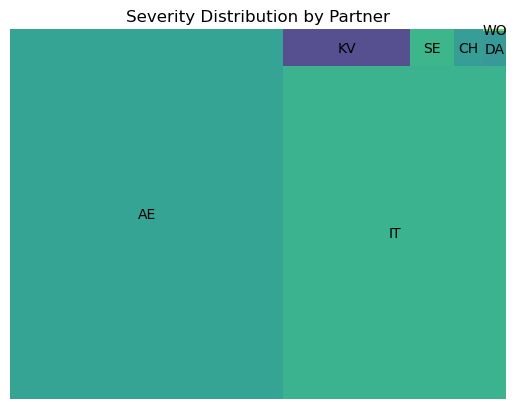

In [128]:
#Plotting  Number of claims
plt.figure()
squarify.plot(
    sizes=Partner_counts['Severity'],
    label=Partner_counts['partner'],
    alpha=0.90
)

plt.axis('off')
plt.title('Severity Distribution by Partner')
plt.show()

* El partner con la mayor severidad es AE, seguido IT y port ultimo KV

# Utilizando los datos de la tabla people , ¿dentro de qué rango etario se encuentra la mayor y menor cantidad de usuarios siniestrados? ¿cuál es su severidad promedio?